In [4]:
%load_ext autoreload
%autoreload 2

In [37]:
%matplotlib inline
import random
from tqdm import tqdm
from collections import Counter
from IPython.display import display

import nyata2017

# Big Data
<i>Fülöp András - Data Scientist @ Lensa|Gitential</i>

<b>NYATA2017</b>, 2017 július 22.

# Python

> *A programozás a legközelebbi dolog a szupererőhöz.*  
> Drew Houston (Dropbox)

In [ ]:
print "Hello NYATA!"

# Számoljunk szavakat!

Adat: MEK (mek.oszk.hu)

In [45]:
bookpaths = nyata2017.list_books('./docs/')
len(books)

12275

In [46]:
with open(bookpaths[0]) as bookfile:
    print bookfile.readline()[:140]

 AZ ATHENAEUM REPERTÓRIUMA 1892-1915  Philosophiai és államtudományi folyóirat  A Magyar Tudományos Akadémia megbízásából szerkes


In [47]:
books = []
for bookpath in tqdm(bookpaths):
    with open(bookpath) as bookfile:
        books.append(bookfile.readline())

100%|███████████████████████████████████| 12275/12275 [00:20<00:00, 613.26it/s]


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import numpy as np

In [44]:
np.mean(sizes)

366885.11853360489

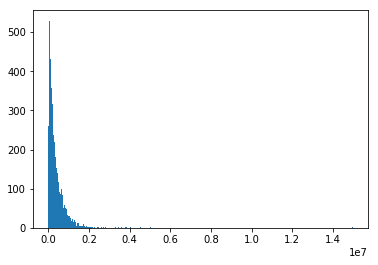

In [54]:
fig, ax = plt.subplots()
_ = ax.hist([len(book) for book in books], bins=1000)